In [1]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('../log/A100_single/logFile_numPointsTotal10000_numBlocksTotal100_m200_seed1_isScaled0_A100_single.csv')

# Display the first few rows of the data
display(df.head())

# Show basic information about the dataset
display(df.info())

,duration_outer_partitioning,duration_finer_partitioning,duration_candidate_preparation,duration_nn_searching,duration_computation,duration_total,total_gflops,numPointsPerProcess,numPointsTotal,numBlocksPerProcess,numBlocksTotal,m,seed,mspe,rmspe,ci_coverage,optimized_log_likelihood
0,0.002403,0.002655,0.000227,0.004541,0.104713,0.138066,1.477128,10000,10000,100,100,200,1,-1,-1,-1,-6.721285e+06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   duration_outer_partitioning     1 non-null      float64
 1   duration_finer_partitioning     1 non-null      float64
 2   duration_candidate_preparation  1 non-null      float64
 3   duration_nn_searching           1 non-null      float64
 4   duration_computation            1 non-null      float64
 5   duration_total                  1 non-null      float64
 6   total_gflops                    1 non-null      float64
 7   numPointsPerProcess             1 non-null      int64  
 8   numPointsTotal                  1 non-null      int64  
 9   numBlocksPerProcess             1 non-null      int64  
 10  numBlocksTotal                  1 non-null      int64  
 11  m                               1 non-null      int64  
 12  seed                            1 non-nu

None

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

N_bsv = [10000, 20000, 50000, 80000, 100000, 200000, 500000, 800000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000]
N_sc = [10000, 20000, 50000, 80000, 100000, 200000, 500000]

N_bs=(100, 300)
M_ests=(200, 600)
m_sc = [60]

seeds = [0, 1, 2, 3, 4]

time_bsv = []
time_sc = []

for N_b in N_bs:
    time_bsv_N_b = []
    for M_est in M_ests:
        time_bsv_m = []
        for N in N_bsv:
            time_bsv_m_seed = []
            for seed in seeds:
                try:
                    df = pd.read_csv(f'../log/A100_single/logFile_numPointsTotal{N}_numBlocksTotal{int(N/N_b)}_m{M_est}_seed{seed}_isScaled0_A100_single.csv')
                    time_bsv_m_seed.append(df['duration_total'].iloc[0])
                except FileNotFoundError:
                    continue
            if len(time_bsv_m_seed) == 0 or np.isnan(np.mean(time_bsv_m_seed)):
                continue
            time_bsv_m.append(np.mean(time_bsv_m_seed))
        time_bsv_N_b.append(time_bsv_m) # list of lists
    time_bsv.append(time_bsv_N_b) # list of lists of lists

for N in N_sc:
    time_sc_seed = []
    for seed in seeds:
        try:
            df = pd.read_csv(f'../log/A100_single/logFile_numPointsTotal{N}_numBlocksTotal{N}_m60_seed{seed}_isScaled0_A100_single.csv')
            time_sc_seed.append(df['duration_total'].iloc[0])
        except FileNotFoundError:
            continue
    time_sc.append(np.mean(time_sc_seed))

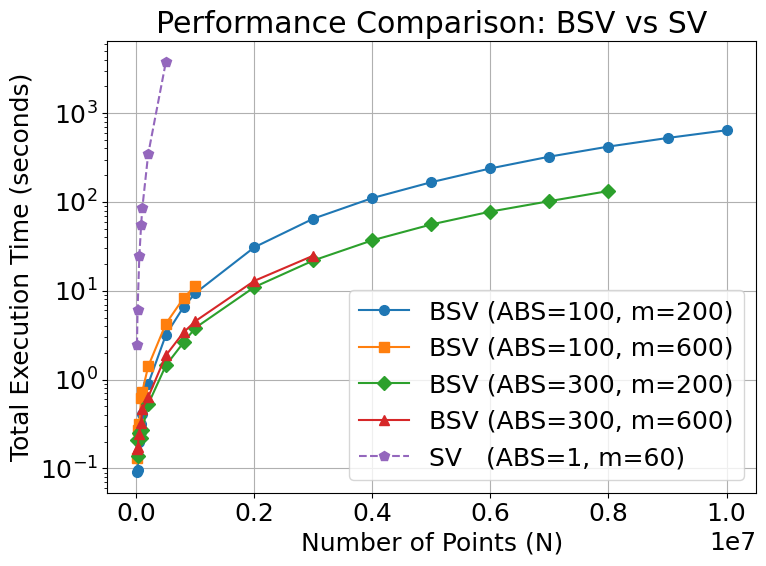

In [3]:
import matplotlib.pyplot as plt
import os

# Set default font size to 16
plt.rcParams.update({'font.size': 18})


plt.figure(figsize=(8, 6))
# Define different markers for each line
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h', '8']


# Plot BSV lines for different m values
for i, N_b in enumerate(N_bs):
    for j, M_est in enumerate(M_ests):
        plt.plot(N_bsv[:len(time_bsv[i][j])], time_bsv[i][j], 
                 label=f'BSV (ABS={N_b}, m={M_est})', 
                 marker=markers[i*len(M_ests)+j],
                 markersize=7)

# Plot SC line
plt.plot(N_sc, time_sc, 
         label='SV   (ABS=1, m=60)', 
         marker=markers[7], 
         linestyle='--',
         markersize=7)

plt.xlabel('Number of Points (N)')
plt.ylabel('Total Execution Time (seconds)')
plt.title('Performance Comparison: BSV vs SV')
plt.grid(True)
plt.legend()
# plt.xscale('log')  # Use log scale for x-axis due to large range
plt.yscale('log')  # Use log scale for y-axis if times vary by orders of magnitude
plt.tight_layout()
os.makedirs('./fig', exist_ok=True)
plt.savefig('./fig/perf_bsv_vs_sv.pdf')
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

N_bsv = [10000, 20000, 50000, 80000, 100000, 200000, 500000, 800000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000]

N_b=(100)
M_est=(400)

seeds = [0, 1, 2, 3, 4]

time_bsv_single1 = []
time_bsv_single2 = []
time_bsv_single4 = []
time_bsv_multi2 = []
time_bsv_multi4 = []

for N in N_bsv:
    # single 1
    time_bsv_m_seed = []
    for seed in seeds:
        try:
            df = pd.read_csv(f'../log/A100_single/logFile_numPointsTotal{N}_numBlocksTotal{int(N/N_b)}_m{M_est}_seed{seed}_isScaled0_A100_single.csv')
            time_bsv_m_seed.append(df['duration_total'].iloc[0])
        except FileNotFoundError:
            continue
    if not np.isnan(np.mean(time_bsv_m_seed)):
        time_bsv_single1.append(np.mean(time_bsv_m_seed))
    
    # single 2
    time_bsv_m_seed = []
    for seed in seeds:
        try:
            df = pd.read_csv(f'../log/A100_single2/logFile_numPointsTotal{N}_numBlocksTotal{int(N/N_b)}_m{M_est}_seed{seed}_isScaled0_A100_single2.csv')
            time_bsv_m_seed.append(df['duration_total'].iloc[0])
        except FileNotFoundError:
            continue
    if not np.isnan(np.mean(time_bsv_m_seed)):
        time_bsv_single2.append(np.mean(time_bsv_m_seed))

    # single 4
    time_bsv_m_seed = []
    for seed in seeds:
        try:
            df = pd.read_csv(f'../log/A100_single4/logFile_numPointsTotal{N}_numBlocksTotal{int(N/N_b)}_m{M_est}_seed{seed}_isScaled0_A100_single4.csv')
            time_bsv_m_seed.append(df['duration_total'].iloc[0])
        except FileNotFoundError:
            continue
    if not np.isnan(np.mean(time_bsv_m_seed)):
        time_bsv_single4.append(np.mean(time_bsv_m_seed))
    
    # multi 2
    time_bsv_m_seed = []
    for seed in seeds:
        try:
            df = pd.read_csv(f'../log/A100_multi2/logFile_numPointsTotal{N}_numBlocksTotal{int(N/N_b)}_m{M_est}_seed{seed}_isScaled0_A100_multi2.csv')
            time_bsv_m_seed.append(df['duration_total'].iloc[0])
        except FileNotFoundError:
            continue
    if not np.isnan(np.mean(time_bsv_m_seed)):
        time_bsv_multi2.append(np.mean(time_bsv_m_seed))

    # multi 4
    time_bsv_m_seed = []
    for seed in seeds:
        try:
            df = pd.read_csv(f'../log/A100_multi4/logFile_numPointsTotal{N}_numBlocksTotal{int(N/N_b)}_m{M_est}_seed{seed}_isScaled0_A100_multi4.csv')
            time_bsv_m_seed.append(df['duration_total'].iloc[0])
        except FileNotFoundError:
            continue
    if not np.isnan(np.mean(time_bsv_m_seed)):
        time_bsv_multi4.append(np.mean(time_bsv_m_seed))


/home/panq/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/panq/.local/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/panq/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/panq/.local/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/panq/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/panq/.local/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / 

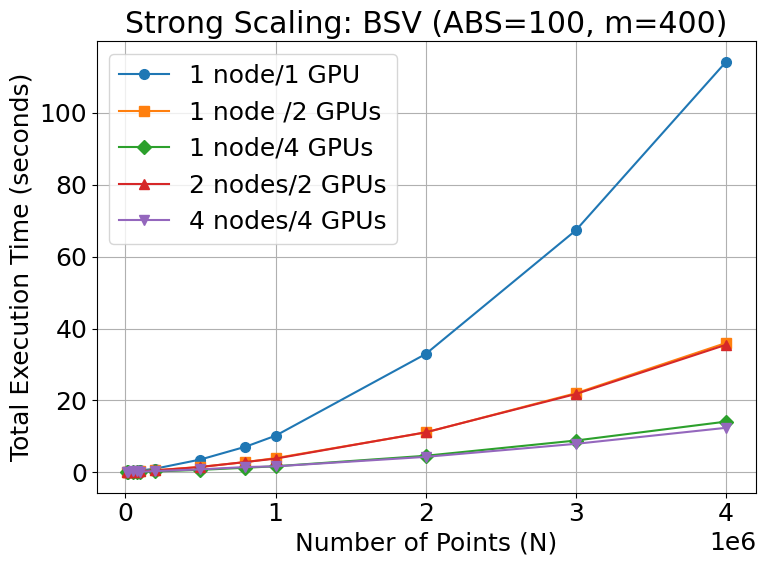

In [9]:
import matplotlib.pyplot as plt

# Set default font size to 16
plt.rcParams.update({'font.size': 18})


plt.figure(figsize=(8, 6))
# Define different markers for each line
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h', '8']

length = len(time_bsv_single1)

# single 1
plt.plot(N_bsv[:length], time_bsv_single1, 
         label=f'1 node/1 GPU', 
         marker=markers[0],
         markersize=7)

# single 2
plt.plot(N_bsv[:length], time_bsv_single2[:length], 
         label=f'1 node /2 GPUs', 
         marker=markers[1],
         markersize=7)

# single 4
plt.plot(N_bsv[:length], time_bsv_single4[:length], 
         label=f'1 node/4 GPUs', 
         marker=markers[2],
         markersize=7)

# multi 2
plt.plot(N_bsv[:length], time_bsv_multi2[:length], 
         label=f'2 nodes/2 GPUs', 
         marker=markers[3],
         markersize=7)

# multi 4
plt.plot(N_bsv[:length], time_bsv_multi4[:length], 
         label=f'4 nodes/4 GPUs', 
         marker=markers[4],
         markersize=7)

plt.xlabel('Number of Points (N)')
plt.ylabel('Total Execution Time (seconds)')
plt.title('Strong Scaling: BSV (ABS=100, m=400)')
plt.grid(True)
plt.legend()
# plt.xscale('log')  # Use log scale for x-axis due to large range
# plt.yscale('log')  # Use log scale for y-axis if times vary by orders of magnitude
plt.tight_layout()
# os.makedirs('./fig', exist_ok=True)
plt.savefig('./fig/perf_strong_scaling.pdf')
plt.show()

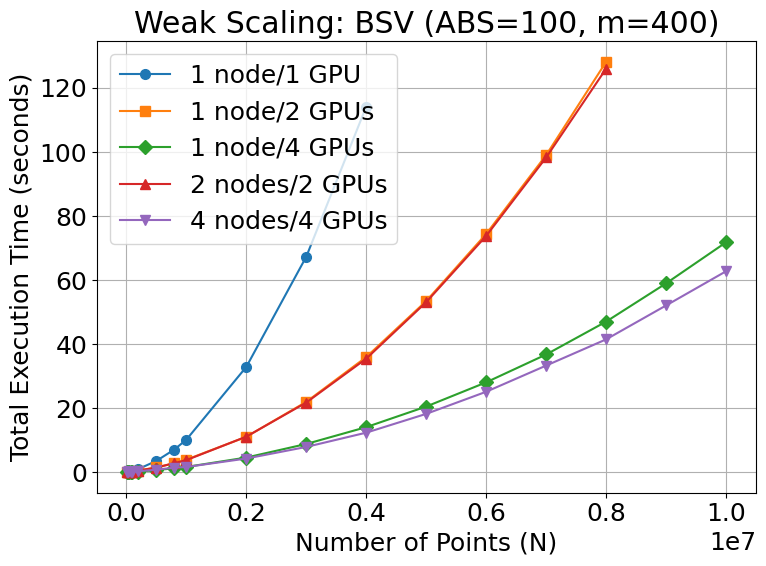

In [10]:
import matplotlib.pyplot as plt

# Set default font size to 16
plt.rcParams.update({'font.size': 18})


plt.figure(figsize=(8, 6))
# Define different markers for each line
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h', '8']


# single 1
plt.plot(N_bsv[:len(time_bsv_single1)], time_bsv_single1, 
         label=f'1 node/1 GPU', 
         marker=markers[0],
         markersize=7)

# single 2
plt.plot(N_bsv[:len(time_bsv_single2)], time_bsv_single2, 
         label=f'1 node/2 GPUs', 
         marker=markers[1],
         markersize=7)

# single 4
plt.plot(N_bsv[:len(time_bsv_single4)], time_bsv_single4, 
         label=f'1 node/4 GPUs', 
         marker=markers[2],
         markersize=7)

# multi 2
plt.plot(N_bsv[:len(time_bsv_multi2)], time_bsv_multi2, 
         label=f'2 nodes/2 GPUs', 
         marker=markers[3],
         markersize=7)

# multi 4
plt.plot(N_bsv[:len(time_bsv_multi4)], time_bsv_multi4, 
         label=f'4 nodes/4 GPUs', 
         marker=markers[4],
         markersize=7)

plt.xlabel('Number of Points (N)')
plt.ylabel('Total Execution Time (seconds)')
plt.title('Weak Scaling: BSV (ABS=100, m=400)')
plt.grid(True)
plt.legend()
# plt.xscale('log')  # Use log scale for x-axis due to large range
# plt.yscale('log')  # Use log scale for y-axis if times vary by orders of magnitude
plt.tight_layout()
# os.makedirs('./fig', exist_ok=True)
plt.savefig('./fig/perf_weak_scaling.pdf')
plt.show()